# ML-Basic-2024. Дунай А.А.

## Домашнее задание. Ансамбли моделей

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Импортируем датасет

In [257]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head().T

0  \
id                                                            2539   
name                            Clean & quiet apt home by the park   
host_id                                                       2787   
host_name                                                     John   
neighbourhood_group                                       Brooklyn   
neighbourhood                                           Kensington   
latitude                                                  40.64749   
longitude                                                -73.97237   
room_type                                             Private room   
price                                                          149   
minimum_nights                                                   1   
number_of_reviews                                                9   
last_review                                             2018-10-19   
reviews_per_month                                             0.21   
calculated_host_listings_count                                   6   
availability_365                                               365   

                                                    1  \
id                                               2595   
name                            Skylit Midtown Castle   
host_id                                          2845   
host_name                                    Jennifer   
neighbourhood_group                         Manhattan   
neighbourhood                                 Midtown   
latitude                                     40.75362   
longitude                                   -73.98377   
room_type                             Entire home/apt   
price                                             225   
minimum_nights                                      1   
number_of_reviews                                  45   
last_review                                2019-05-21   
reviews_per_month                                0.38   
calculated_host_listings_count                      2   
availability_365                                  355   

                                                                  2  \
id                                                             3647   
name                            THE VILLAGE OF HARLEM....NEW YORK !   
host_id                                                        4632   
host_name                                                 Elisabeth   
neighbourhood_group                                       Manhattan   
neighbourhood                                                Harlem   
latitude                                                   40.80902   
longitude                                                  -73.9419   
room_type                                              Private room   
price                                                           150   
minimum_nights                                                    3   
number_of_reviews                                                 0   
last_review                                                     NaN   
reviews_per_month                                               NaN   
calculated_host_listings_count                                    1   
availability_365                                                365   

                                                              3  \
id                                                         3831   
name                            Cozy Entire Floor of Brownstone   
host_id                                                    4869   
host_name                                           LisaRoxanne   
neighbourhood_group                                    Brooklyn   
neighbourhood                                      Clinton Hill   
latitude                                               40.68514   
longitude                                             -73.95976   
room_type                                       Entire home/apt   
price                     

### Удалим ненужные признаки: id, name, host_id, host_name, last_review

In [258]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis = 1)

In [252]:
df.head().T

0                1             2  \
neighbourhood_group                 Brooklyn        Manhattan     Manhattan   
neighbourhood                     Kensington          Midtown        Harlem   
latitude                            40.64749         40.75362      40.80902   
longitude                          -73.97237        -73.98377      -73.9419   
room_type                       Private room  Entire home/apt  Private room   
price                                    149              225           150   
minimum_nights                             1                1             3   
number_of_reviews                          9               45             0   
reviews_per_month                       0.21             0.38           NaN   
calculated_host_listings_count             6                2             1   
availability_365                         365              355           365   

                                              3                4  
neighbourhood_group                    Brooklyn        Manhattan  
neighbourhood                      Clinton Hill      East Harlem  
latitude                               40.68514         40.79851  
longitude                             -73.95976        -73.94399  
room_type                       Entire home/apt  Entire home/apt  
price                                        89               80  
minimum_nights                                1               10  
number_of_reviews                           270                9  
reviews_per_month                          4.64              0.1  
calculated_host_listings_count                1                1  
availability_365                            194                0

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


### Визуализируем базовые статистики данных: распределения признаков, матрицу попарных корреляций, постройте pair plots

### Распределения признаков

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>, <Axes: >]],
      dtype=object)

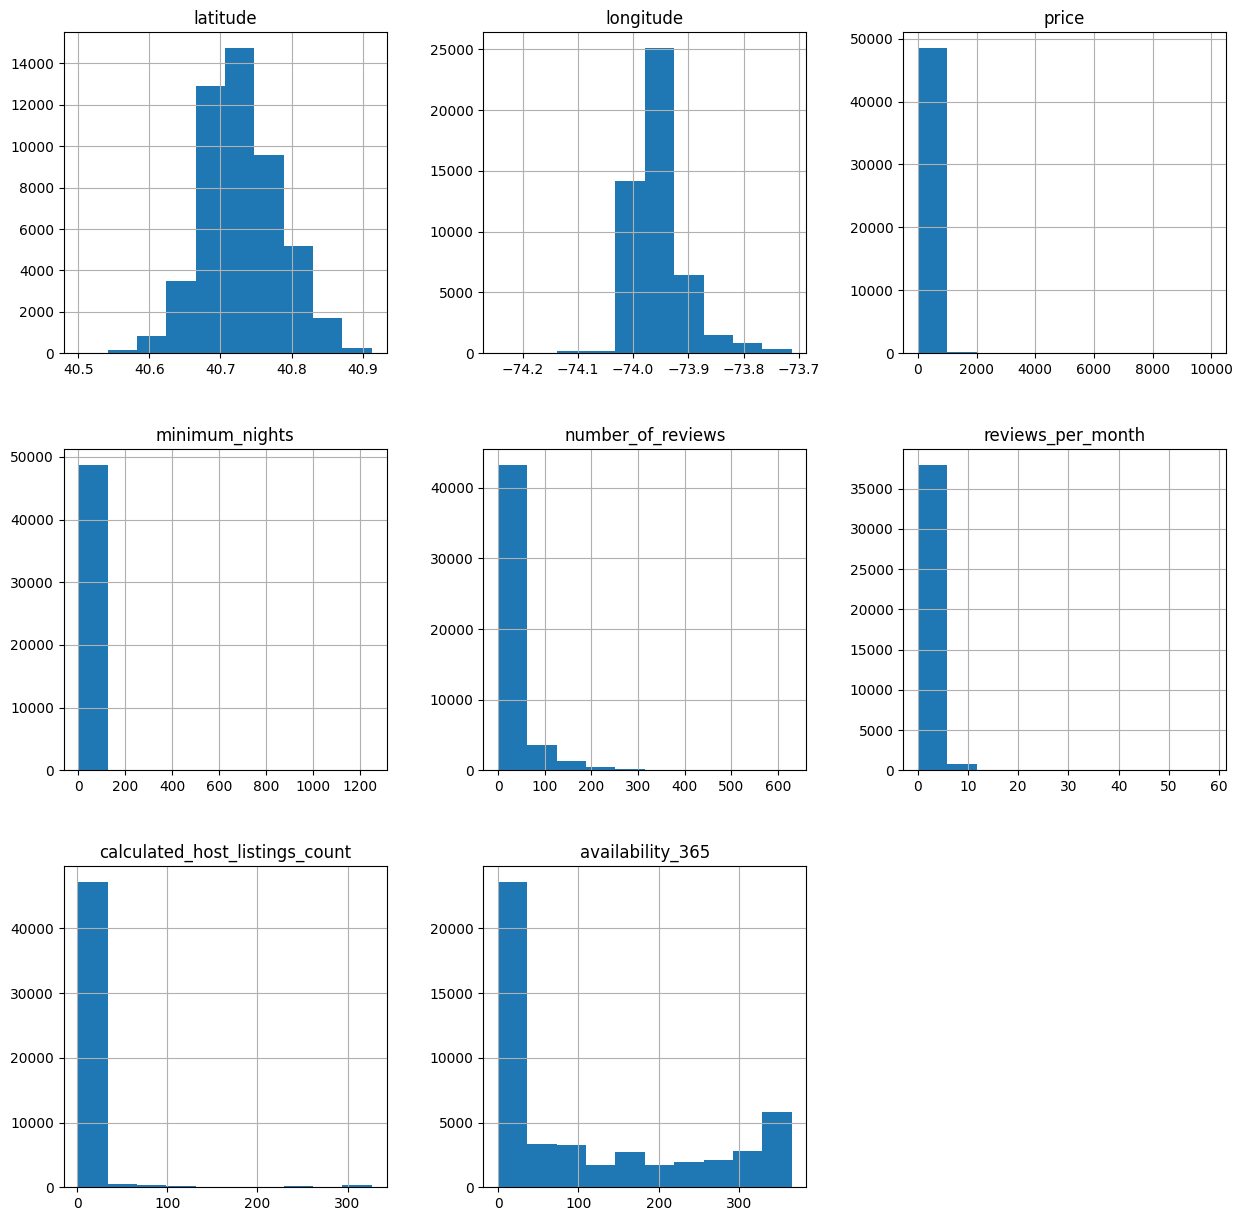

In [161]:
df.hist(figsize=(15,15))

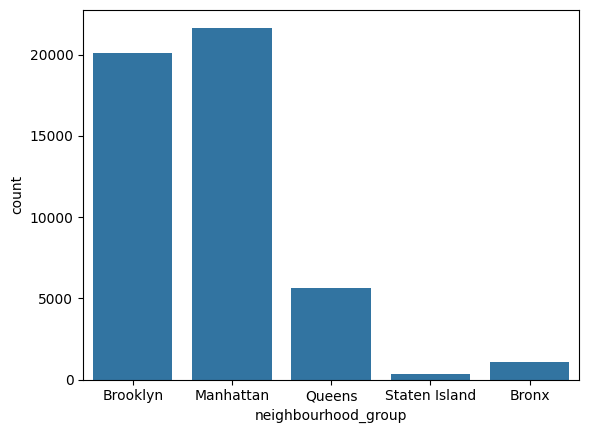

In [162]:
ax = sns.countplot(x="neighbourhood_group", data=df)

In [163]:
dfc=pd.DataFrame(df['neighbourhood'].value_counts()).reset_index()
dfc

neighbourhood  count
0          Williamsburg   3920
1    Bedford-Stuyvesant   3714
2                Harlem   2658
3              Bushwick   2465
4       Upper West Side   1971
..                  ...    ...
216      Fort Wadsworth      1
217        Richmondtown      1
218            New Dorp      1
219           Rossville      1
220         Willowbrook      1

[221 rows x 2 columns]

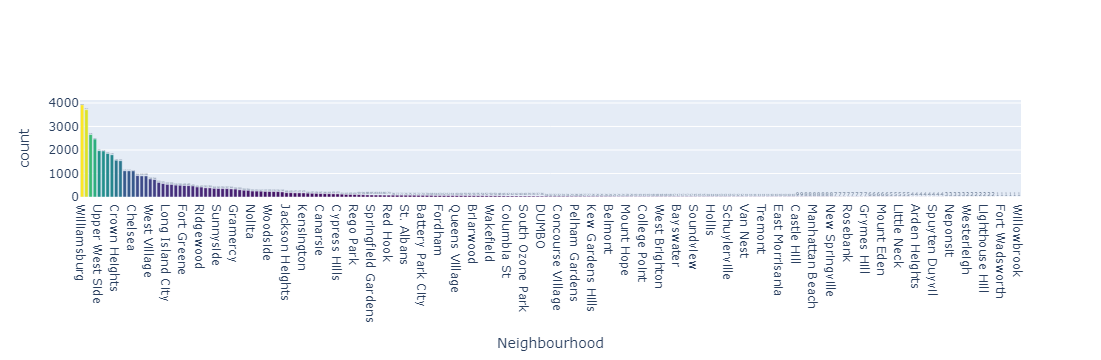

In [164]:
fig = go.Figure(go.Bar(
    x=dfc['neighbourhood'],y=dfc['count'],
    marker={'color': dfc['count'], 
    'colorscale': 'Viridis'},  
    text=dfc['count'],
    textposition = "outside",
))
fig.update_layout(xaxis_title="Neighbourhood",yaxis_title="count")
fig.show()

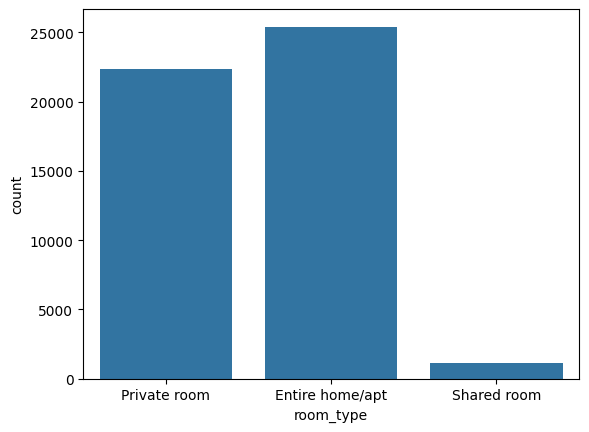

In [165]:
ax = sns.countplot(x="room_type", data=df)

### Матрица попарных корреляций

In [166]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [167]:
numerical = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

<Axes: >

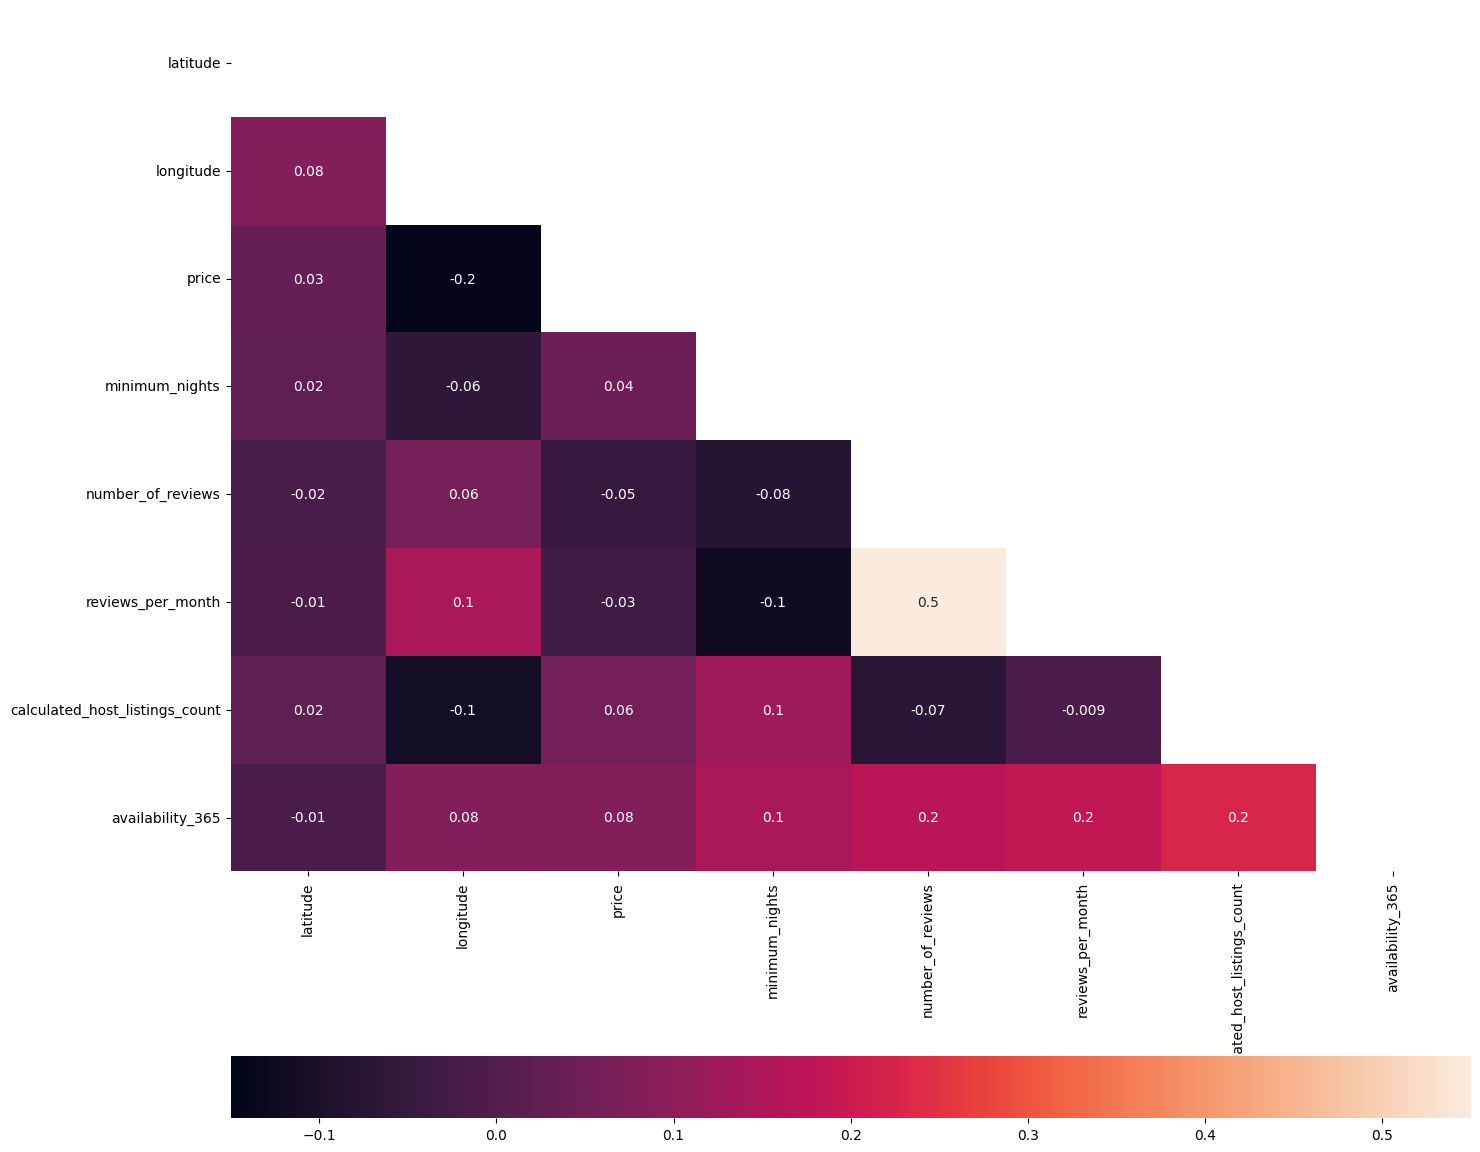

In [168]:
matrix = np.triu(df[numerical].corr())
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df[numerical].corr(), annot = True, mask=matrix, fmt='.1g', cbar_kws= {'orientation': 'horizontal'})

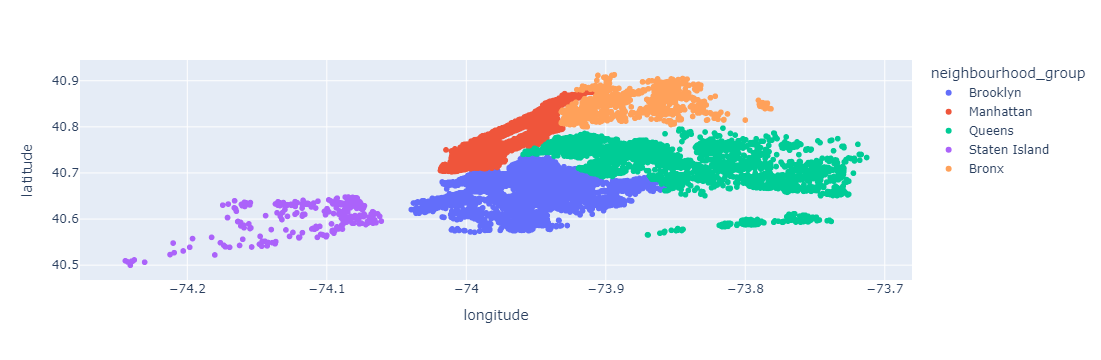

In [169]:
fig = px.scatter(df, x='longitude', y='latitude',
                 color='neighbourhood_group') 
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

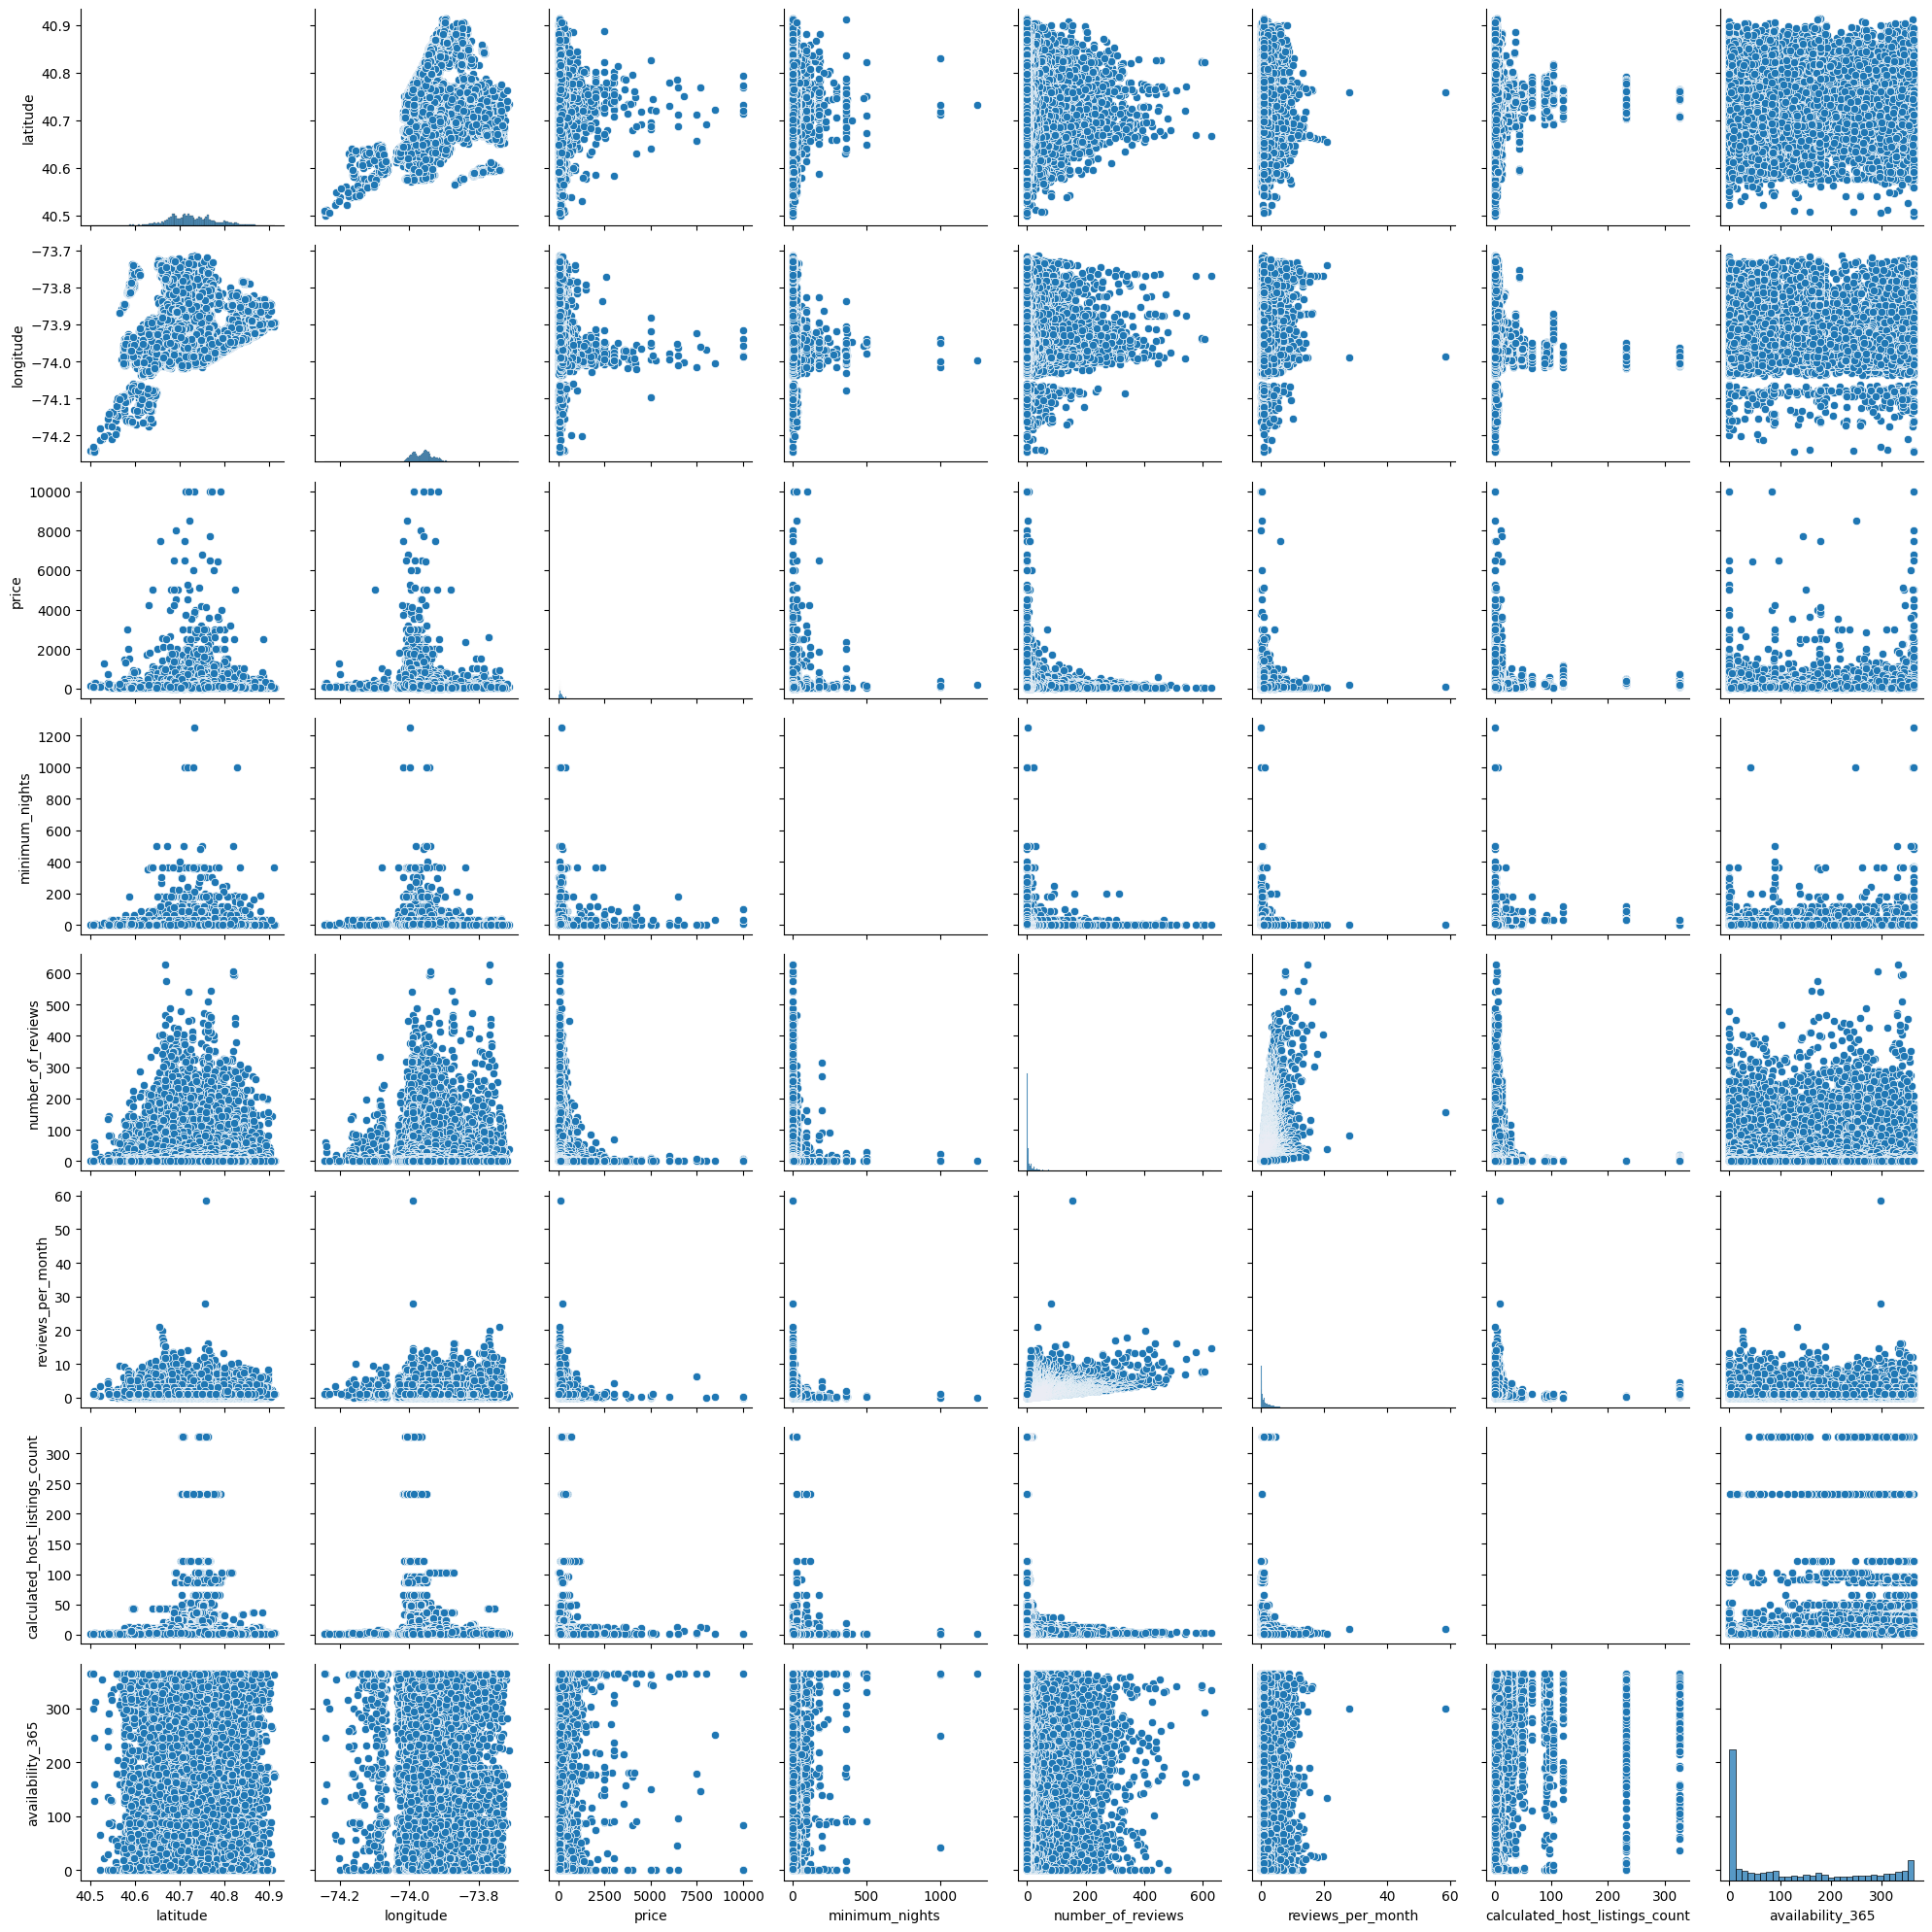

In [170]:
sns.pairplot(df)

plt.tight_layout()
plt.show()

In [225]:
df.describe()

neighbourhood_group  neighbourhood      latitude     longitude  \
count         48895.000000   48895.000000  48895.000000  48895.000000   
mean              1.675345     107.122732     40.728949    -73.952170   
std               0.735816      68.743096      0.054530      0.046157   
min               0.000000       0.000000     40.499790    -74.244420   
25%               1.000000      51.000000     40.690100    -73.983070   
50%               2.000000      94.000000     40.723070    -73.955680   
75%               2.000000     178.000000     40.763115    -73.936275   
max               4.000000     220.000000     40.913060    -73.712990   

          room_type         price  minimum_nights  number_of_reviews  \
count  48895.000000  48895.000000    48895.000000       48895.000000   
mean       0.504060    152.720687        7.029962          23.274466   
std        0.545379    240.154170       20.510550          44.550582   
min        0.000000      0.000000        1.000000           0.000000   
25%        0.000000     69.000000        1.000000           1.000000   
50%        0.000000    106.000000        3.000000           5.000000   
75%        1.000000    175.000000        5.000000          24.000000   
max        2.000000  10000.000000     1250.000000         629.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count       48895.000000                    48895.000000      48895.000000  
mean            1.090910                        7.143982        112.781327  
std             1.597283                       32.952519        131.622289  
min             0.000000                        1.000000          0.000000  
25%             0.040000                        1.000000          0.000000  
50%             0.370000                        1.000000         45.000000  
75%             1.580000                        2.000000        227.000000  
max            58.500000                      327.000000        365.000000

### Предобработаем переменные

In [172]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Заполним нулевые значения

In [259]:
df['reviews_per_month'].fillna(value=0, inplace=True)

C:\Users\dunai\AppData\Local\Temp\ipykernel_11176\181101443.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [260]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [261]:
df.head().T

0                1             2  \
neighbourhood_group                 Brooklyn        Manhattan     Manhattan   
neighbourhood                     Kensington          Midtown        Harlem   
latitude                            40.64749         40.75362      40.80902   
longitude                          -73.97237        -73.98377      -73.9419   
room_type                       Private room  Entire home/apt  Private room   
price                                    149              225           150   
minimum_nights                             1                1             3   
number_of_reviews                          9               45             0   
reviews_per_month                       0.21             0.38           0.0   
calculated_host_listings_count             6                2             1   
availability_365                         365              355           365   

                                              3                4  
neighbourhood_group                    Brooklyn        Manhattan  
neighbourhood                      Clinton Hill      East Harlem  
latitude                               40.68514         40.79851  
longitude                             -73.95976        -73.94399  
room_type                       Entire home/apt  Entire home/apt  
price                                        89               80  
minimum_nights                                1               10  
number_of_reviews                           270                9  
reviews_per_month                          4.64              0.1  
calculated_host_listings_count                1                1  
availability_365                            194                0

#### Закодируем категориальные фичи

In [248]:
data_pred = df
data_pred.head().T

0          1          2          3  \
neighbourhood_group               1.00000    2.00000    2.00000    1.00000   
neighbourhood                   108.00000  127.00000   94.00000   41.00000   
latitude                         40.64749   40.75362   40.80902   40.68514   
longitude                       -73.97237  -73.98377  -73.94190  -73.95976   
room_type                         1.00000    0.00000    1.00000    0.00000   
price                           149.00000  225.00000  150.00000   89.00000   
minimum_nights                    1.00000    1.00000    3.00000    1.00000   
number_of_reviews                 9.00000   45.00000    0.00000  270.00000   
reviews_per_month                 0.21000    0.38000    0.00000    4.64000   
calculated_host_listings_count    6.00000    2.00000    1.00000    1.00000   
availability_365                365.00000  355.00000  365.00000  194.00000   

                                       4  
neighbourhood_group              2.00000  
neighbourhood                   61.00000  
latitude                        40.79851  
longitude                      -73.94399  
room_type                        0.00000  
price                           80.00000  
minimum_nights                  10.00000  
number_of_reviews                9.00000  
reviews_per_month                0.10000  
calculated_host_listings_count   1.00000  
availability_365                 0.00000

In [234]:
le = preprocessing.LabelEncoder()

le.fit(data_pred['neighbourhood_group'])
data_pred['neighbourhood_group']=le.transform(data_pred['neighbourhood_group'])

le.fit(data_pred['neighbourhood'])
data_pred['neighbourhood']=le.transform(data_pred['neighbourhood'])

le.fit(data_pred['room_type'])
data_pred['room_type']=le.transform(data_pred['room_type'])

In [235]:
data_pred.head()

neighbourhood_group  neighbourhood  latitude  longitude  room_type  price  \
0                    1            108  40.64749  -73.97237          1    149   
1                    2            127  40.75362  -73.98377          0    225   
2                    2             94  40.80902  -73.94190          1    150   
3                    1             41  40.68514  -73.95976          0     89   
4                    2             61  40.79851  -73.94399          0     80   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0               0.00   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

#### Оценим качество

In [236]:
lm = LinearRegression()

In [237]:
X = data_pred.drop(['price', 'latitude'], inplace=False, axis=1)
y = data_pred['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm.fit(X_train, y_train)

LinearRegression()

In [238]:
predictions = lm.predict(X_test)

In [239]:
mae = np.round(metrics.mean_absolute_error(y_test, predictions), 2)
mse = np.round(metrics.mean_squared_error(y_test, predictions), 2)
rmse = np.round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2)
r2 = np.round(metrics.r2_score(y_test, predictions), 2)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 73.03
MSE (Mean Squared Error): 35561.46
RMSE (Root mean squared error): 188.58
R2 score: 0.12


In [240]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': np.round(predictions.flatten(), 2)})
error.head(10)

Actual Values  Predicted Values
0             89            217.41
1             30            105.77
2            120            111.73
3            470            245.96
4            199            175.09
5            170            154.94
6             90             99.68
7             60            163.99
8            150            214.29
9             74             98.56

#### Попробуем поработать с фичами

#### Используем dummy для категориальных переменных 

In [273]:
df = pd.read_csv("AB_NYC_2019.csv")
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis = 1)
df['reviews_per_month'].fillna(value=0, inplace=True)

C:\Users\dunai\AppData\Local\Temp\ipykernel_11176\3142762550.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [274]:
data_pred = df

In [275]:
data_pred = pd.get_dummies(data_pred, columns=['room_type'], drop_first=True)
data_pred = pd.get_dummies(data_pred, columns=['neighbourhood'], drop_first=True)
data_pred = pd.get_dummies(data_pred, columns=['neighbourhood_group'], drop_first=True)

In [276]:
data_pred.head().T

0         1         2         3  \
latitude                           40.64749  40.75362  40.80902  40.68514   
longitude                         -73.97237 -73.98377  -73.9419 -73.95976   
price                                   149       225       150        89   
minimum_nights                            1         1         3         1   
number_of_reviews                         9        45         0       270   
...                                     ...       ...       ...       ...   
neighbourhood_Woodside                False     False     False     False   
neighbourhood_group_Brooklyn           True     False     False      True   
neighbourhood_group_Manhattan         False      True      True     False   
neighbourhood_group_Queens            False     False     False     False   
neighbourhood_group_Staten Island     False     False     False     False   

                                          4  
latitude                           40.79851  
longitude                         -73.94399  
price                                    80  
minimum_nights                           10  
number_of_reviews                         9  
...                                     ...  
neighbourhood_Woodside                False  
neighbourhood_group_Brooklyn          False  
neighbourhood_group_Manhattan          True  
neighbourhood_group_Queens            False  
neighbourhood_group_Staten Island     False  

[234 rows x 5 columns]

In [277]:
X = data_pred.drop(['price', 'latitude'], inplace=False, axis=1)
y = data_pred['price']
y = np.log10(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm.fit(X_train, y_train)

C:\Users\dunai\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log10



ValueError: Input y contains infinity or a value too large for dtype('float64').

In [266]:
predictions = lm.predict(X_test)

In [268]:
mae = np.round(metrics.mean_absolute_error(y_test, predictions), 2)
mse = np.round(metrics.mean_squared_error(y_test, predictions), 2)
rmse = np.round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2)
r2 = np.round(metrics.r2_score(y_test, predictions, multioutput='variance_weighted'), 2)

print('MAE (Mean Absolute Error): %s' %mae)
print('MSE (Mean Squared Error): %s' %mse)
print('RMSE (Root mean squared error): %s' %rmse)
print('R2 score: %s' %r2)

MAE (Mean Absolute Error): 3536650.35
MSE (Mean Squared Error): 1.2231000154721419e+17
RMSE (Root mean squared error): 349728468.31
R2 score: -2764802743407.82


In [247]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': np.round(predictions.flatten(), 2)})
error.head(10)

Actual Values  Predicted Values
0             89            161.82
1             30             47.75
2            120            127.22
3            470            214.94
4            199            173.41
5            170            152.16
6             90             96.02
7             60            150.66
8            150            272.94
9             74            130.91